In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import datetime
import sys
from matplotlib import pyplot as plt

D:\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
finaltag = pd.read_csv("蚂蚁金服原始数据/总数据集/finaltag.csv",encoding='utf_8',engine = 'python')
finaltag['a'] = finaltag['answer'].apply(lambda x:str(x)[0])
finaltag

textid  sentid                                  text  answer  a
0            1       0                          开始说借后面没就没上线了   501.0  5
1            1       1                              现在话都不回一个   501.0  5
2            1       2                                     唉   701.0  7
3            2       0                            他诈骗说能开通备用金   104.0  1
4            2       1                          你们可以去看一下好多诈骗   701.0  7
5            2       2                              说可以开通备用金   104.0  1
6            2       3                              叫我转账30给他   306.0  3
7            2       4                              然后就把我拉黑了   501.0  5
8            3       0                       骗我交钱小说个小的然后一直要钱   503.0  5
9            3       1                                   不退钱   504.0  5
10           3       2                                  接单没钱   101.0  1
11           4       0                              他以贷款流水不足   107.0  1
12           4       1                            要求我转帐过去刷流水   305.0  3
13           4       2                               最后说返钱给我   305.0  3
14           4       3                                 却把我拉黑   501.0  5
15           5       0                             他说给我单子让我刷   101.0  1
16           5       1                        说先用一张没有钱的银行卡支付   701.0  7
17           5       2                             然后会跳出余额不足   701.0  7
18           5       3                              然后在用花呗支付   701.0  7
19           5       4                           他说用花呗不会支付出去   304.0  3
20           5       5                            现在两次全部支付出去   504.0  5
21           5       6                     现在还要我充1200QB才能弄回来   503.0  5
22           6       0                              这是交的主持会费   307.0  3
23           6       1                         交完后我就后悔了叫她返会费   701.0  7
24           6       2                               就直接拉黑我了   501.0  5
25           7       0                           他以玩游戏充值送分为由   103.0  1
26           7       1                                骗了我五千元   701.0  7
27           7       2                             结果人都联系不上了   501.0  5
28           8       0                   盗用我朋友的QQ号像我骗取4000元钱   205.0  2
29           8       1                 一次是通过微信扫描二维码转账给对方1200   701.0  7
...        ...     ...                                   ...     ... ..
197848   93330       2                             有可能快递中丢失了   701.0  7
197849   93330       3  后来第二天就是今天我收到一个自称申通的快递公司打电话过来说我的快递丢失了   201.0  2
197850   93330       4                               说完把钱退给我   107.0  1
197851   93330       5                              但是要我加他微信   402.0  4
197852   93330       6                        他给我发了一个支付宝的二维码   701.0  7
197853   93330       7                        我进去一看要输入账号密码登录   701.0  7
197854   93330       8                          然后对方让我打开借呗开通   701.0  7
197855   93330       9                              说里面的钱是他的   701.0  7
197856   93330      10                            他还有钱要退给其他人   701.0  7
197857   93330      11                  说让我把里面的钱按照他的方式进行一个付款   308.0  3
197858   93330      12                            剩下的就是给我退的钱   308.0  3
197859   93330      13               但是退到后面对方说还没有达到可以给我回退的金额   307.0  3
197860   93330      14                            还要我用花呗进行付款   307.0  3
197861   93330      15                                然后用信用卡   701.0  7
197862   93330      16                               后来觉悟是骗子   701.0  7
197863   93330      17                                 已经报警了   701.0  7
197864   93330      18                      骗子每次让我付款的账都是1960   701.0  7
197865   93330      19                         一共向对方付了30772元   701.0  7
197866   93331       0                            让我在支付宝扫码付款   305.0  3
197867   93331       1                              付款后找不到订单   502.0  5
197868   93331       2                           然后让我加QQ联系客服   402.0  4
197869   93331       3                          客服让我再充值2000元   307.0  3
197870   93331       4                              不充就没办法退款   307.0  3
197871   93332       0                          

In [15]:
#文章包含多少个句子
text_len = finaltag.groupby(['textid'],as_index = False)['sentid'].count()
text_len_count = text_len.groupby(['sentid'],as_index = False)['textid'].count()
text_len_count.to_excel("蚂蚁金服原始数据/数据分析/text_len_count.xlsx",index=False,encoding='utf-8')
text_len_count

sentid  textid
0        1    3275
1        2    5739
2        3    7852
3        4    6986
4        5    5331
5        6    3604
6        7    2375
7        8    1632
8        9    1221
9       10     873
10      11     483
11      12     342
12      13     249
13      14     201
14      15     174
15      16     124
16      17     100
17      18      92
18      19      77
19      20      74
20      21      50
21      22      44
22      23      41
23      24      27
24      25      26
25      26      24
26      27      21
27      28      10
28      29      11
29      30      11
30      31       6
31      32       3
32      33       4
33      34       4
34      35       5
35      36       4
36      38       1
37      39       2
38      40       2
39      42       1
40      46       1
41      53       1

In [19]:
#每个句子的长度
finaltag['sent_len'] = finaltag['text'].apply(lambda x:len(str(x)))
sent_len_count = finaltag.groupby(['sent_len'],as_index = False)['sentid'].count()
sent_len_count.to_excel("蚂蚁金服原始数据/数据分析/sent_len_count.xlsx",index=False,encoding='utf-8')
sent_len_count

sent_len  sentid
0           1     251
1           2    2862
2           3    5268
3           4   14881
4           5   16591
5           6   22006
6           7   20710
7           8   19975
8           9   16960
9          10   14284
10         11   11789
11         12    9606
12         13    7752
13         14    6386
14         15    5031
15         16    3958
16         17    3295
17         18    2616
18         19    2187
19         20    1696
20         21    1372
21         22    1104
22         23     900
23         24     775
24         25     606
25         26     540
26         27     447
27         28     404
28         29     339
29         30     296
..        ...     ...
130       137       2
131       138       1
132       139       1
133       142       2
134       144       1
135       145       4
136       148       2
137       149       1
138       150       3
139       151       1
140       152       1
141       155       1
142       158       1
143       159       4
144       163       2
145       173       1
146       175       1
147       186       1
148       193       1
149       197       1
150       199       1
151       200       1
152       202       1
153       210       1
154       237       1
155       245       1
156       251       1
157       298       1
158       312       1
159       316       1

[160 rows x 2 columns]

In [10]:
count = finaltag.groupby(['answer'],as_index = False)['textid'].count()
count.to_excel("蚂蚁金服原始数据/数据分析/count.xlsx",index=False,encoding='utf-8')

In [11]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

%matplotlib inline

bar = Bar()
bar.add_xaxis(list(count['answer']))
bar.add_yaxis("labels", list(count['textid']))

c = (
    Bar({"theme": ThemeType.DARK})
    .add_xaxis(list(count['answer']))
    .add_yaxis("real labels", list(count['textid']))
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar"),
                     datazoom_opts=opts.DataZoomOpts(),
                    toolbox_opts=opts.ToolboxOpts(),)
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="min", name="最小值"),
                opts.MarkLineItem(type_="max", name="最大值"),
                opts.MarkLineItem(type_="average", name="平均值"),
                ]
            ),
        )
    )

c.render_notebook()

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie

c = (
    Pie()
    .add("", [list(z) for z in zip(count['answer'], count['textid'])])
    .set_global_opts(title_opts=opts.TitleOpts(title="Pie"),
                    legend_opts=opts.LegendOpts(
                        orient="vertical", pos_top="15%", pos_left="2%"),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
    )
c.render_notebook()

In [33]:
tag_mapping = pd.read_csv('zhengshi3/tagclass.csv',sep=',',encoding='utf_8_sig')
tag_mapping

tag  class       method
0   101      0       网络兼职赚钱
1   102      1       实物交易欺诈
2   103      2       虚拟商品欺诈
3   104      3         服务欺诈
4   105      4   投资理财/借贷/返利
5   106      5           套现
6   107      6       虚构其他内容
7   201      7      假冒客服/快递
8   202      8     假冒金融服务公司
9   203      9       假冒公司资质
10  204     10       假冒政府机构
11  205     11         假冒个人
12  206     12           其他
13  301     13        收付款混淆
14  302     14    依赖人情关系的转账
15  303     15    罚款性质/威胁行为
16  304     16    答应不会付出去的钱
17  305     17      答应退回的资金
18  306     18         购买价格
19  307     19       过程中的费用
20  308     20           其他
21  401     21  通话短信等非APP交流
22  402     22    腾讯系社交聊天平台
23  403     23     其他社交聊天平台
24  404     24      阿里系电商平台
25  405     25      小视频直播平台
26  406     26        网站/链接
27  408     27           其他
28  501     28         失去联系
29  502     29       核实后为虚构
30  503     30       需要继续付款
31  504     31   未实现承诺/交易目的
32  505     32           其他
33  601     33    挽回损失/退回资金
34  602     34  处罚对方/不让他人受骗
35  603     35           其他
36  701     36            无

In [5]:
train = pd.read_csv('zhengshi3/preprocess/train.txt',sep='\t',names=['textid','sentid','text','label'],encoding='utf-8')
valid = pd.read_csv('zhengshi3/preprocess/dev.txt',sep='\t',names=['textid','sentid','text','label'],encoding='utf-8')
test = pd.read_csv('zhengshi3/preprocess/test.txt',sep='\t',names=['textid','sentid','text','label'],encoding='utf-8')
df = pd.concat([train, valid, test]).sort_values(by=['textid','sentid']).reset_index(drop=True)
df

textid  sentid                                  text  label
0          1       0                          开始说借后面没就没上线了     28
1          1       1                              现在话都不回一个     28
2          1       2                                     唉     36
3          2       0                            他诈骗说能开通备用金      3
4          2       1                          你们可以去看一下好多诈骗     36
5          2       2                              说可以开通备用金      3
6          2       3                              叫我转账30给他     18
7          2       4                              然后就把我拉黑了     28
8          3       0                       骗我交钱小说个小的然后一直要钱     30
9          3       1                                   不退钱     31
10         3       2                                  接单没钱      0
11         4       0                              他以贷款流水不足      6
12         4       1                            要求我转帐过去刷流水     17
13         4       2                               最后说返钱给我     17
14         4       3                                 却把我拉黑     28
15         5       0                             他说给我单子让我刷      0
16         5       1                        说先用一张没有钱的银行卡支付     36
17         5       2                             然后会跳出余额不足     36
18         5       3                              然后在用花呗支付     36
19         5       4                           他说用花呗不会支付出去     16
20         5       5                            现在两次全部支付出去     31
21         5       6                     现在还要我充1200QB才能弄回来     30
22         6       0                              这是交的主持会费     19
23         6       1                         交完后我就后悔了叫她返会费     36
24         6       2                               就直接拉黑我了     28
25         7       0                           他以玩游戏充值送分为由      2
26         7       1                                骗了我五千元     36
27         7       2                             结果人都联系不上了     28
28         8       0                   盗用我朋友的QQ号像我骗取4000元钱     11
29         8       1                 一次是通过微信扫描二维码转账给对方1200     36
...      ...     ...                                   ...    ...
8994    1672       2                             有可能快递中丢失了     36
8995    1672       3  后来第二天就是今天我收到一个自称申通的快递公司打电话过来说我的快递丢失了      7
8996    1672       4                               说完把钱退给我      6
8997    1672       5                              但是要我加他微信     22
8998    1672       6                        他给我发了一个支付宝的二维码     36
8999    1672       7                        我进去一看要输入账号密码登录     36
9000    1672       8                          然后对方让我打开借呗开通     36
9001    1672       9                              说里面的钱是他的     36
9002    1672      10                            他还有钱要退给其他人     36
9003    1672      11                  说让我把里面的钱按照他的方式进行一个付款     20
9004    1672      12                            剩下的就是给我退的钱     20
9005    1672      13               但是退到后面对方说还没有达到可以给我回退的金额     19
9006    1672      14                            还要我用花呗进行付款     19
9007    1672      15                                然后用信用卡     36
9008    1672      16                               后来觉悟是骗子     36
9009    1672      17                                 已经报警了     36
9010    1672      18                      骗子每次让我付款的账都是1960     36
9011    1672      19                         一共向对方付了30772元     36
9012    1673       0                            让我在支付宝扫码付款     17
9013    1673       1                              付款后找不到订单     29
9014    1673       2                           然后让我加QQ联系客服     22
9015    1673       3                          客服让我再充值2000元     19
9016    1673       4                              不充就没办法退款     19
9017    1674       0                                以做任务为由      0
9018    1674       1                          一开始不到一百一单返五元     36
9019    1674       2                              后来逐渐增大金额     36
9020    1674       3                             一单里面包含三小单     36
9021    1674       4                          三小单里金额一个比一个大     36
9022    1674       5                          

In [20]:
def cal_transaction_matrix(sent_tags,obs):
    # 得到所有标签
    tags_num = {}
    for tag in sent_tags:
        if tag not in tags_num.keys():
            tags_num[tag] = 0
    tags_list = list(tags_num.keys())
    print(tags_list)
    # 转移矩阵、发射矩阵
    transaction_matrix = np.zeros((len(tags_list), len(tags_list)), dtype=float)

    textlist = set(obs['textid'])
    for text in textlist:
        tmp = obs[obs.textid == text].reset_index(drop=True)
        sent_pos_list = list(tmp['label'])
        for i in range(1,len(sent_pos_list)):
            tag = sent_pos_list[i]
            pre_tag = sent_pos_list[i-1]
            transaction_matrix[tags_list.index(pre_tag)][tags_list.index(tag)] += 1
            tags_num[tag] += 1
            
    for row in range(transaction_matrix.shape[0]):
        n = np.sum(transaction_matrix[row])
        transaction_matrix[row] /= n


    times_sum = sum(tags_num.values())
    for item in tags_num.keys():
        tags_num[item] = tags_num[item] / times_sum

    # 返回隐状态，初始概率，转移概率，发射矩阵概率
    return tags_list, tags_num.values(), transaction_matrix


In [21]:
hid, init_p, trans_p = cal_transaction_matrix(tag_mapping['class'],df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [35]:
trans_frame = pd.DataFrame(trans_p)
trans_frame.columns = tag_mapping['method']
trans_frame.index = tag_mapping['method']
trans_frame

method         网络兼职赚钱    实物交易欺诈    虚拟商品欺诈      服务欺诈  投资理财/借贷/返利        套现  \
method                                                                      
网络兼职赚钱       0.089716  0.000000  0.000000  0.000000    0.000000  0.000000   
实物交易欺诈       0.000000  0.068571  0.000000  0.000000    0.000000  0.000000   
虚拟商品欺诈       0.006173  0.000000  0.055556  0.006173    0.000000  0.006173   
服务欺诈         0.015504  0.000000  0.000000  0.100775    0.000000  0.000000   
投资理财/借贷/返利   0.000000  0.000000  0.000000  0.007812    0.085938  0.000000   
套现           0.000000  0.000000  0.000000  0.000000    0.000000  0.111111   
虚构其他内容       0.002392  0.007177  0.004785  0.002392    0.002392  0.000000   
假冒客服/快递      0.055556  0.000000  0.000000  0.055556    0.069444  0.000000   
假冒金融服务公司     0.000000  0.000000  0.000000  0.050000    0.250000  0.000000   
假冒公司资质       0.160000  0.000000  0.000000  0.000000    0.000000  0.000000   
假冒政府机构       0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
假冒个人         0.027778  0.027778  0.027778  0.000000    0.000000  0.027778   
其他           0.064516  0.064516  0.000000  0.032258    0.064516  0.000000   
收付款混淆        0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
依赖人情关系的转账    0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
罚款性质/威胁行为    0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
答应不会付出去的钱    0.016194  0.000000  0.000000  0.000000    0.000000  0.000000   
答应退回的资金      0.003922  0.000000  0.000000  0.000000    0.003922  0.000000   
购买价格         0.003676  0.003676  0.007353  0.011029    0.007353  0.000000   
过程中的费用       0.007782  0.000000  0.000000  0.003891    0.007782  0.000000   
其他           0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
通话短信等非APP交流  0.076923  0.000000  0.000000  0.038462    0.076923  0.000000   
腾讯系社交聊天平台    0.108108  0.031532  0.013514  0.009009    0.022523  0.000000   
其他社交聊天平台     0.000000  0.125000  0.000000  0.000000    0.000000  0.000000   
阿里系电商平台      0.030303  0.060606  0.000000  0.030303    0.000000  0.000000   
小视频直播平台      0.090909  0.181818  0.090909  0.000000    0.090909  0.000000   
网站/链接        0.032258  0.000000  0.096774  0.000000    0.000000  0.000000   
其他           0.090909  0.000000  0.090909  0.227273    0.000000  0.000000   
失去联系         0.000000  0.003745  0.000000  0.000000    0.000000  0.000000   
核实后为虚构       0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
需要继续付款       0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
未实现承诺/交易目的   0.004988  0.000000  0.000000  0.000000    0.004988  0.000000   
其他           0.000000  0.000000  0.000000  0.022222    0.000000  0.000000   
挽回损失/退回资金    0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
处罚对方/不让他人受骗  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
其他           0.035714  0.000000  0.000000  0.000000    0.000000  0.000000   
无            0.018291  0.004498  0.005697  0.005397    0.004798  0.000300   

method         虚构其他内容   假冒客服/快递  假冒金融服务公司    假冒公司资质  ...        其他      失去联系  \
method                                               ...                       
网络兼职赚钱       0.037199  0.000000  0.000000  0.002188  ...  0.002188  0.026258   
实物交易欺诈       0.062857  0.005714  0.000000  0.000000  ...  0.000000  0.085714   
虚拟商品欺诈       0.024691  0.000000  0.000000  0.000000  ...  0.006173  0.067901   
服务欺诈         0.038760  0.007752  0.000000  0.007752  ...  0.000000  0.054264   
投资理财/借贷/返利   0.007812  0.000000  0.007812  0.000000  ...  0.000000  0.031250   
套现           0.000000  0.111111  0.000000  0.000000  ...  0.000000  0.000000   
虚构其他内容       0.186603  0.009569  0.000000  0.004785  ...  0.000000  0.035885   
假冒客服/快递      0.111111  0.083333  0.000000  0.000000  ...  0.000000  0.000000   
假冒金融服务公司     0.050000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
假冒公司资质       0.080000  0.000000  0.000000  0.040000  ...  0.040000  0.000000   
假冒政府机构       0.250000  0.000000  0.0

In [37]:
trans_frame.to_excel("zhengshi3/trans_frame.xlsx",encoding="utf-8")

In [3]:
def plot(x,valid,test,plot_type,save_name):
    plt.figure()
    plt.plot(x, valid, label="valid_"+plot_type, linewidth=1)
    plt.plot(x, test, label="test_"+plot_type, linewidth=1)

    plt.xlabel("Epoch")
    plt.ylabel(plot_type)
    plt.title("Learning Curve")
    plt.grid(True)
    # plt.legend(loc="lower right")
    plt.legend(loc='best')
    plt.savefig(save_name,dpi=200)

    plt.show()

In [8]:
lstm = pd.read_csv('zhengshi3/slstm.csv',sep=',',encoding='utf-8')
lstm

dev_f1    test_f1    dev_acc   test_acc
0   14.219474  14.778761  14.219474  14.765694
1   13.891081  18.612975  15.610510  19.540230
2   13.095238  15.866797  20.092736  23.430592
3   12.190476  12.117843  25.502318  26.525199
4    9.919028  10.065908  27.511592  29.089302
5    9.230769   9.815951  28.129830  30.150309
6    9.316770  10.363973  29.057187  30.946065
7    9.968847  11.491443  29.675425  31.564987
8    9.968847  13.253012  29.984544  32.272325
9   10.061602  14.055986  29.520866  32.979664
10  10.728745  15.023474  29.366306  33.244916
11   9.929078  15.939500  28.902628  33.598585
12   8.924949  16.050808  28.593509  33.510168
13   9.638554  16.857798  28.902628  33.952255
14   9.667674  17.623650  29.211747  34.482759
15   9.648241  17.822899  29.057187  34.482759
16   9.648241  18.701008  29.211747  35.101680
17   9.409409  18.648800  29.211747  34.924845
18   9.036145  18.334265  29.057187  34.836428
19   9.523810  18.151448  28.438949  34.748011
20   9.390609  18.836565  28.593509  35.101680
21   9.552239  19.105467  28.593509  35.013263
22   9.371884  19.273128  28.438949  35.190097
23   9.920635  19.305019  28.748068  35.278515
24   9.741551  19.627193  28.748068  35.278515
25  10.029499  19.672131  28.129830  35.190097
26   9.861933  20.141535  28.284389  35.455349
27   9.990206  20.760870  28.129830  35.809019
28  10.166178  20.337140  28.129830  35.543767
29  10.206084  20.423683  28.284389  35.455349
30  10.166178  20.801733  27.975270  35.720601

In [9]:
print(list(lstm.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


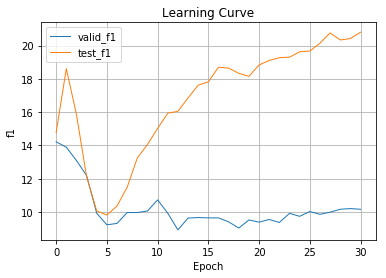

In [12]:
plot(list(lstm.index),lstm['dev_f1'],lstm['test_f1'],"f1","zhengshi3/slstm_f1.jpg")

In [8]:
#导入相关库
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [9]:
finaltag = pd.read_csv("to22/finaltag.csv",sep=',',encoding='utf_8_sig')
finaltag.head()

textid  sentid          text  answer  label
0       1       0  开始说借后面没就没上线了     501     29
1       1       1      现在话都不回一个     501     29
2       1       2             唉     701     37
3       2       0    他诈骗说能开通备用金     104      4
4       2       1  你们可以去看一下好多诈骗     701     37

In [13]:
texts = finaltag.groupby("textid")
countdict = {}
niter = 5
for i in range(1,niter+1):
    for j in range(1,8):
        countdict[(i,j)] = 0

for name,group in texts:
    textid = name
    leng = len(group)
    if leng == 1:
        for i in range(leng):
            sentid = i+1
            label = int(str(group['answer'].iloc[i])[0])
            countdict[(sentid,label)] += 1
    else:    
        for i in range(leng):
            sentid = i+1
            location = sentid/leng
            label = int(str(group['answer'].iloc[i])[0])
            if location<=1/niter:
                countdict[(1,label)] += 1
            elif location>1/niter and location<=2/niter:
                countdict[(2,label)] += 1
            elif location>2/niter and location<=3/niter:
                countdict[(3,label)] += 1
            elif location>3/niter and location<=4/niter:
                countdict[(4,label)] += 1
            else:
                countdict[(5,label)] += 1   
countdict

{(1, 1): 5735,
 (1, 2): 545,
 (1, 3): 708,
 (1, 4): 1083,
 (1, 5): 172,
 (1, 6): 20,
 (1, 7): 3341,
 (2, 1): 5934,
 (2, 2): 501,
 (2, 3): 2287,
 (2, 4): 1229,
 (2, 5): 665,
 (2, 6): 28,
 (2, 7): 7952,
 (3, 1): 3544,
 (3, 2): 258,
 (3, 3): 2869,
 (3, 4): 660,
 (3, 5): 1934,
 (3, 6): 69,
 (3, 7): 8816,
 (4, 1): 1967,
 (4, 2): 98,
 (4, 3): 2834,
 (4, 4): 369,
 (4, 5): 3692,
 (4, 6): 218,
 (4, 7): 9418,
 (5, 1): 1377,
 (5, 2): 88,
 (5, 3): 2170,
 (5, 4): 306,
 (5, 5): 9570,
 (5, 6): 1025,
 (5, 7): 10157}

In [101]:
x = list(range(1,6))
first = []
second = []
third =[]
fourth = []
fifth = []
six = []
seven = []
for key in countdict.keys():
    loca = key[1]
    val = countdict[key]
    if loca == 1:
        first.append(val)
    elif loca == 2:
        second.append(val)
    elif loca == 3:
        third.append(val)
    elif loca == 4:
        fourth.append(val)
    elif loca == 5:
        fifth.append(val)
    elif loca == 6:
        six.append(val)
    else:
        seven.append(val)


In [102]:
print(x)

[1, 2, 3, 4, 5]


In [103]:
first = list(map(lambda x:round(x/sum(first)*100,2),first))
#"%.2f%%" % (a * 100)
second = list(map(lambda x:round(x/sum(second)*100,2),second))
third = list(map(lambda x:round(x/sum(third)*100,2),third))
fourth = list(map(lambda x:round(x/sum(fourth)*100,2),fourth))
fifth = list(map(lambda x:round(x/sum(fifth)*100,2),fifth))
six = list(map(lambda x:round(x/sum(six)*100,2),six))
seven = list(map(lambda x:round(x/sum(seven)*100,2),seven))

In [104]:
print(first)

[30.9, 31.98, 19.1, 10.6, 7.42]


In [109]:
%matplotlib inline

from pyecharts import options as opts
from pyecharts.charts import Bar


bar = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("虚构内容",first, gap="0%")
    .add_yaxis("虚构身份",second, gap="0%")
    .add_yaxis("钱款转移理由",third, gap="0%")
    .add_yaxis("联系渠道",fourth, gap="0%")
    .add_yaxis("如何意识被骗",fifth, gap="0%")
    .add_yaxis("用户诉求",six, gap="0%")
    .add_yaxis("无",seven, gap="0%")
    .set_global_opts(title_opts=opts.TitleOpts(title="不同欺诈元素分句位置分布"),
                     yaxis_opts=opts.AxisOpts(name="百分比"),
                     xaxis_opts=opts.AxisOpts(name="分句位置"),
                     #toolbox_opts=opts.ToolboxOpts(orient = "vertical"),
                     legend_opts=opts.LegendOpts(is_show=True,pos_top=40),
                    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True,formatter="{c}%",font_size=8),
        )
    .render("bar.html")
)

#bar.render_notebook()